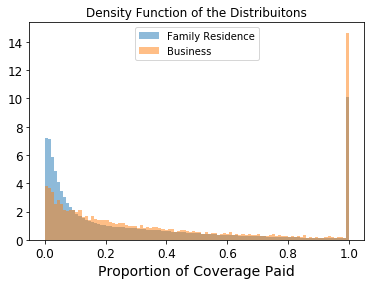

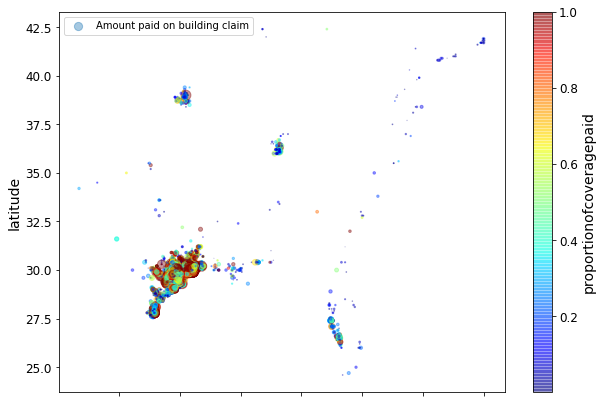

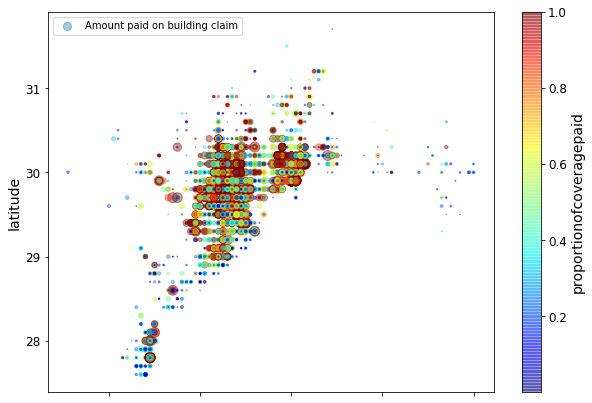

In [20]:
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def load_claims_data():
    csv_path = os.path.join("openFEMA_claims20190630.csv")
    return pd.read_csv(csv_path)

claims = load_claims_data()
claims.shape

#Let's clean the data to get claims in the continental US. 
claims = claims[claims.longitude >= -130]
claims = claims[claims.longitude <= -66]
claims = claims[claims.latitude >= 24.5]
claims = claims[claims.latitude <= 49.2]

claims = claims[claims.totalbuildinginsurancecoverage <750000]
claims = claims[(claims.amountpaidonbuildingclaim >0) & (claims.amountpaidonbuildingclaim <1000000) ]

claims['proportionofcoveragepaid']  = claims['amountpaidonbuildingclaim']/claims['totalbuildinginsurancecoverage']

claims = claims[claims.proportionofcoveragepaid <= 1.0]

claims['log_paid'] = np.log(claims['amountpaidonbuildingclaim'])

claims['log_proportion'] = np.log(claims['proportionofcoveragepaid'])

residence_family = claims[claims.occupancytype == 1]
residence_2to4plex = claims[claims.occupancytype == 2]
residence_5ormore = claims[claims.occupancytype == 3]
non_residence = claims[claims.occupancytype == 4]
business = claims[claims.occupancytype == 6]

bins = np.linspace(0, 1, 100)

plt.title("Density Function of the Distribuitons")
plt.xlabel('Proportion of Coverage Paid')


plt.hist(residence_family.proportionofcoveragepaid, bins, alpha=0.5, label='Family Residence',density = True)
#plt.hist(residence_2to4plex.proportionofcoveragepaid, bins, alpha=0.5, label='Duples',density = True)
#plt.hist(residence_5ormore.proportionofcoveragepaid, bins, alpha=0.5, label='Apartments',density = True)
#plt.hist(non_residence.proportionofcoveragepaid, bins, alpha=0.5, label='Non Residence',density = True)
plt.hist(business.proportionofcoveragepaid, bins, alpha=0.5, label='Business',density = True)
plt.legend(loc='upper center')
plt.show()

#Let's also just look at hurricane Harvey. 
claims = claims[claims.longitude >= -104]
claims = claims[(claims.dateofloss == '2017-09-02') | (claims.dateofloss == '2017-09-01')| (claims.dateofloss == '2017-08-31')| (claims.dateofloss == '2017-08-30')| (claims.dateofloss == '2017-08-29')| (claims.dateofloss == '2017-08-28')| (claims.dateofloss == '2017-08-27')| (claims.dateofloss == '2017-08-26')| (claims.dateofloss == '2017-08-25')| (claims.dateofloss == '2017-08-24')| (claims.dateofloss == '2017-08-23')| (claims.dateofloss == '2017-08-22')| (claims.dateofloss == '2017-08-21')| (claims.dateofloss == '2017-08-20')| (claims.dateofloss == '2017-08-19')| (claims.dateofloss == '2017-08-18')| (claims.dateofloss == '2017-08-17')]

claims.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=claims["amountpaidonbuildingclaim"]/5000, label="Amount paid on building claim", figsize=(10,7),
    c="proportionofcoveragepaid", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

#Let's also just look at Houston in particular.  
houston = claims[(claims.longitude >= -100)&(claims.longitude <= -90)&(claims.latitude >= 23)&(claims.latitude <= 32)]

houston.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=houston["amountpaidonbuildingclaim"]/5000, label="Amount paid on building claim", figsize=(10,7),
    c="proportionofcoveragepaid", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()